In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=5
paper='1508.00296'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let me analyze the given Hamiltonian equation and answer each question step by step.

First, let's break down the Hamiltonian:

The non-interacting part includes:
1. $t_{\rm N} \sum_{k, \sigma} a^{\dagger}_{k \sigma} a_{k \sigma} \sum_n e^{-ik\cdot n}$ - Hopping term for "N" atoms
2. $t_{\rm B} \sum_{k, \sigma} b^{\dagger}_{k \sigma} b_{k \sigma} \sum_n e^{-ik\cdot n}$ - Hopping term for "B" atoms
3. $t_{\rm BN} \sum_{k, \sigma} (a^{\dagger}_{k \sigma} b_{k \sigma} \sum_{n'} \exp{-ik\cdot n'} + b^{\dagger}_{k \sigma} a_{k \sigma} \sum_{n'} \exp{ik\cdot n'})$ - Hopping between "B" and "N" atoms
4. $\Delta \sum_{k, \sigma} a^{\dagger}_{k \sigma} a_{k \sigma}$ - On-site energy for "N" atoms

The interacting part (Hartree terms) includes:
1. $\frac{U_{\rm B}}{N} \sum_{k, \sigma \neq \sigma'} \langle b^{\dagger}_{k, \sigma} b_{k, \sigma} \rangle b^{\dagger}_{k, \sigma'} b_{k, \sigma'}$ - Interaction between different spins on "B" sites
2.

In [7]:
print(generated_code['thinking'])

Let me analyze the given Hamiltonian equation and answer each question step by step.

First, let's break down the Hamiltonian:

The non-interacting part includes:
1. $t_{\rm N} \sum_{k, \sigma} a^{\dagger}_{k \sigma} a_{k \sigma} \sum_n e^{-ik\cdot n}$ - Hopping term for "N" atoms
2. $t_{\rm B} \sum_{k, \sigma} b^{\dagger}_{k \sigma} b_{k \sigma} \sum_n e^{-ik\cdot n}$ - Hopping term for "B" atoms
3. $t_{\rm BN} \sum_{k, \sigma} (a^{\dagger}_{k \sigma} b_{k \sigma} \sum_{n'} \exp{-ik\cdot n'} + b^{\dagger}_{k \sigma} a_{k \sigma} \sum_{n'} \exp{ik\cdot n'})$ - Hopping between "B" and "N" atoms
4. $\Delta \sum_{k, \sigma} a^{\dagger}_{k \sigma} a_{k \sigma}$ - On-site energy for "N" atoms

The interacting part (Hartree terms) includes:
1. $\frac{U_{\rm B}}{N} \sum_{k, \sigma \neq \sigma'} \langle b^{\dagger}_{k, \sigma} b_{k, \sigma} \rangle b^{\dagger}_{k, \sigma'} b_{k, \sigma'}$ - Interaction between different spins on "B" sites
2. $\frac{U_{\rm N}}{N} \sum_{k, \sigma \neq \sigma'} \

In [8]:
print(generated_code['text'])

# ANSWER:

1) Number of Flavors, D = (2, 2)
Basis Order:
0: atom_type. Order: N (vertices), B (centers)
1: spin. Order: spin_up, spin_down

2) EXP-VAL DEPENDENT TERMS: {
    r"\langle b^{\dagger}_{k, \sigma} b_{k, \sigma} \rangle": "Mean density of B atoms with spin σ",
    r"\langle a^{\dagger}_{k, \sigma} a_{k, \sigma} \rangle": "Mean density of N atoms with spin σ"
}
  
TERMS:
- $t_{\rm N} \sum_{k, \sigma} a^{\dagger}_{k \sigma} a_{k \sigma} \sum_n e^{-ik\cdot n}$ -> H[0, σ, 0, σ, k], NI (for σ ∈ {0, 1})
- $t_{\rm B} \sum_{k, \sigma} b^{\dagger}_{k \sigma} b_{k \sigma} \sum_n e^{-ik\cdot n}$ -> H[1, σ, 1, σ, k], NI (for σ ∈ {0, 1})
- $t_{\rm BN} \sum_{k, \sigma} (a^{\dagger}_{k \sigma} b_{k \sigma} \sum_{n'} \exp{-ik\cdot n'})$ -> H[0, σ, 1, σ, k], NI (for σ ∈ {0, 1})
- $t_{\rm BN} \sum_{k, \sigma} (b^{\dagger}_{k \sigma} a_{k \sigma} \sum_{n'} \exp{ik\cdot n'})$ -> H[1, σ, 0, σ, k], NI (for σ ∈ {0, 1})
- $\Delta \sum_{k, \sigma} a^{\dagger}_{k \sigma} a_{k \sigma}$ -> H[0, σ, 0, σ,

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
  """
  Hartree-Fock Hamiltonian for a square-centered lattice with N atoms at vertices 
  and B atoms at centers.
  
  Args:
    N_shell (int): Number of shells in the first Brillouin zone.
    parameters (dict): Dictionary containing model parameters.
    filling_factor (float): Filling factor of the system. Default is 0.5.
  """
  def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
    self.lattice = 'square'  # Square-centered lattice
    self.D = (2, 2)  # (atom_type, spin)
    self.basis_order = {'0': 'atom_type', '1': 'spin'}
    # atom_type: 0=N (vertices), 1=B (centers)
    # spin: 0=up, 1=down

    # Occupancy relevant parameters
    self.nu = filling_factor
    self.T = parameters.get('T', 0)  # temperature, default to 0
    self.a = parameters.get('a', 1.0)  # Lattice constant
    self.k_space = generate_k_space(self.lattice, N_shell, self.a)
   

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1508_00296_5.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

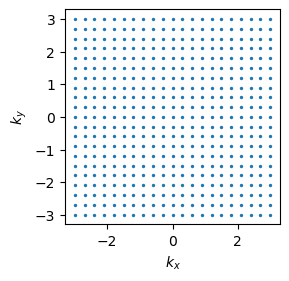

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0},filling_factor=1/2)


In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

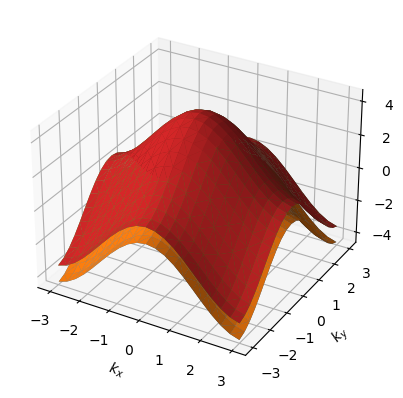

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

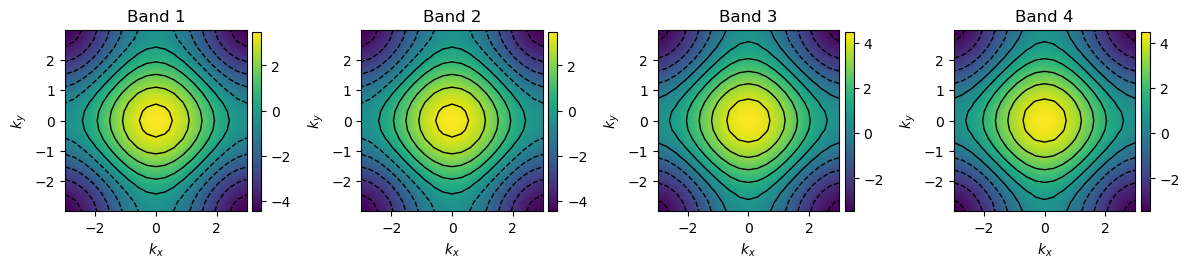

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'V_BN':1e-5,'U_N':0,'U_B':0,'V_B':0},filling_factor=1/2)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

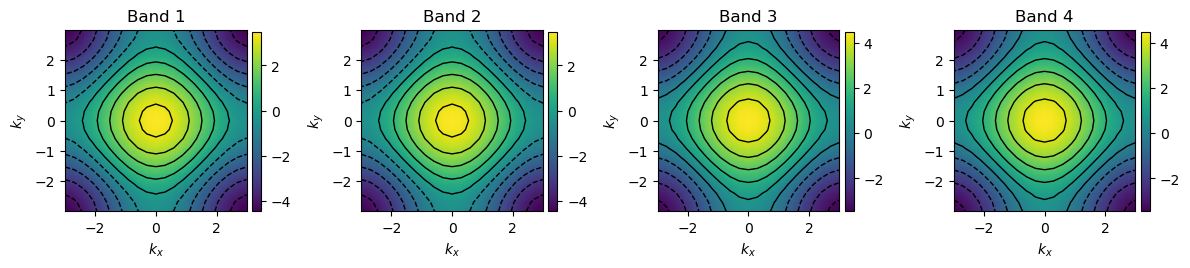

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'V_BN':1e5,'U_N':0,'U_B':0,'V_B':0},filling_factor=1/2)


In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
h_nonint[1,1,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

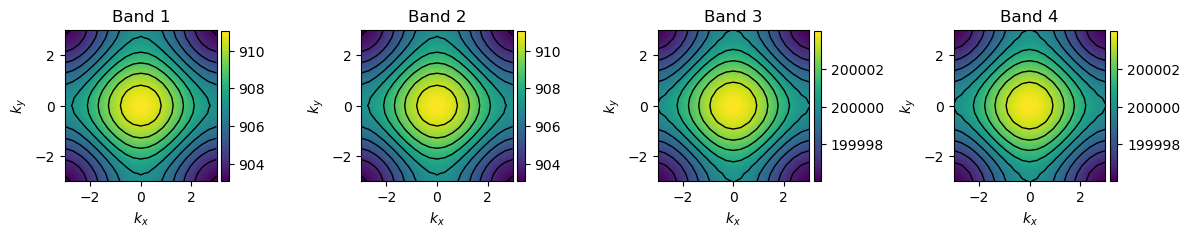

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 199085.02
U/T is 47130.68
mean_U is 25028.34


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

I need to evaluate whether the image provided meets the requirements in the rubric. Let me break this down:

1. First, I need to understand what the image is showing. The image appears to be a 2D plot of k-space or momentum space, with kx on the x-axis and ky on the y-axis. The plot shows a grid of blue dots evenly spaced in a square region from approximately -3 to 3 in both kx and ky directions.

2. According to the rubric, this image should show a momentum space mesh in the first Brillouin zone of the problem.

3. I need to check if the point group symmetry is correct.

Let's analyze the problem:

The Hamiltonian describes a system with two types of atoms (N and B) on a square-centered lattice, where:
- N atoms are at the vertices of the square lattice
- B atoms are at the center of the square lattice

For a square-centered lattice (or a square lattice with a basis), the first Brillouin zone is typically a square in k-space. The im

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

I need to analyze the band structure plots shown in the image based on the rubric provided. Let's go through the rubric step by step:

1. First, I need to identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square-centered lattice.

From the plots, I can see that the k_x and k_y axes range from approximately -3 to 3, with the plotting region being square. This is consistent with the Brillouin zone for a square-centered lattice, which should indeed be square-shaped. In a square-centered lattice (with N atoms at the vertices and B atoms at the center), the first Brillouin zone is square-shaped.

2. Next, I need to examine the symmetry of the energy distribution shown by the false color plot:

2.1 The highest energy regions (yellow) appear to be at the center of each plot (around k_x = 0, k_y = 0).

2.2 The pattern of energy variation across the zone appears to be radially symmetric, decreasing

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper,Gap=0,nu=1/2)
    )


#################### THINKING ####################

I'll analyze the provided band structure plots according to the rubric.

1. First, let's identify the shape of the Brillouin zone (BZ) boundary.

Looking at the plots, I see that the x and y axes are labeled as k_x and k_y, and they range from approximately -3 to 3. This represents the momentum space. For a square-centered lattice (where N atoms are at vertices and B atoms at the center of square lattice), we would expect a square-shaped Brillouin zone. From the contour plots shown, the region appears to be square-shaped, matching what we would expect for the described lattice.

2. Next, I'll examine the symmetry of the energy distribution shown by the false color plot.

2.1 The highest energy regions (yellow) appear to be located at the center of each plot, around (k_x, k_y) = (0, 0).

2.2 Tracing the pattern of energy variation across the zone:
- The energy decreases radially outward from the center in all directions
- The contour 

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='V_BN = 1e5',nu=1/2)
    )


#################### THINKING ####################

Let me analyze this problem step by step according to the rubric.

First, I need to examine the image provided, which shows four plots labeled "Band 1," "Band 2," "Band 3," and "Band 4." These appear to be false color plots of the band structure in the first Brillouin zone after a self-consistent Hartree-Fock calculation.

Let's go through the rubric points:

1. **Brillouin Zone Boundary**:
   The image shows a square Brillouin zone, which is appropriate for a square-centered lattice (with N atoms at vertices and B atoms at centers). The axes in each plot range from approximately -3 to 3 for both kx and ky, which captures the first Brillouin zone. This appears correct.

2. **Symmetry of Energy Distribution**:
   2.1 **Highest Energy Regions**: In all four bands, the highest energy regions (yellow) appear at the center of the Brillouin zone (k = 0,0).
   2.2 **Energy Variation Pattern**: The energy decreases radially outward from the 

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '5' saved to final_answer.yaml
